In [1]:
from datetime import datetime, timedelta
from quantlib.datasource.service import DataService
# Create service with Alpha Vantage
service = DataService.create_default_service()

In [2]:
# Create service with Alpha Vantage
service = DataService.create_default_service()

# Get data
end_date = datetime.now()
start_date = end_date - timedelta(days=30)

In [3]:
service.list_sources()

['yahoo_finance', 'mt5']

In [4]:
import pandas as pd
from functools import reduce
path = r"C:\Users\enzob\AppData\Roaming\MetaQuotes\Terminal\D0E8209F77C8CF37AD8BF550E51FF075\MQL5\Profiles\Tester\algo\price\WIN_PROFIT_FACTORY\\"
strategies = ['maxproffitfactor.csv', 'proffitfactorbalance.csv', 'proffitfactorlowstd.csv', 'profitfactormeanreversion.csv']

strats_dfs = {}
for strategy in strategies:
    strats_dfs[strategy] = pd.read_csv(path + strategy, sep='\t', decimal=',', encoding='UTF-16LE')
    strats_dfs[strategy][strategy.replace('.csv', '')] =  strats_dfs[strategy]['<BALANCE>'].astype(float)
    strats_dfs[strategy]['<DATE>'] = pd.to_datetime(strats_dfs[strategy]['<DATE>'], format='%Y.%m.%d %H:%M')
    strats_dfs[strategy] = strats_dfs[strategy][['<DATE>', strategy.replace('.csv', '')]]

merged_df = reduce(lambda left, right: pd.merge(left, right, on='<DATE>', how='outer'), strats_dfs.values())
merged_df.fillna(method='ffill', inplace=True)
#merged_df['total'] = merged_df[merged_df.columns[1:]].sum(axis=1)
merged_df['<DATE>'] = pd.to_datetime(merged_df['<DATE>'].dt.date)
merged_df = merged_df.groupby('<DATE>').last()


C:\Users\enzob\AppData\Local\Temp\ipykernel_17460\3730473544.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)


In [12]:
path = r"C:\Users\enzob\AppData\Roaming\MetaQuotes\Terminal\D0E8209F77C8CF37AD8BF550E51FF075\MQL5\Profiles\Tester\algo\price\BIT_PROFIT_FACTORY\\"
strategies = ['maxproffitfactor.csv', 'proffitfactorlowstd.csv', 'profitfactormeanreversion.csv']

strats_dfs = {}
for strategy in strategies:
    strats_dfs[strategy] = pd.read_csv(path + strategy, sep='\t', decimal=',', encoding='UTF-16LE')
    strats_dfs[strategy][strategy.replace('.csv', '')] =  strats_dfs[strategy]['<BALANCE>'].astype(float)
    strats_dfs[strategy]['<DATE>'] = pd.to_datetime(strats_dfs[strategy]['<DATE>'], format='%Y.%m.%d %H:%M')
    strats_dfs[strategy] = strats_dfs[strategy][['<DATE>', strategy.replace('.csv', '')]]

merged_df_bit = reduce(lambda left, right: pd.merge(left, right, on='<DATE>', how='outer'), strats_dfs.values())
merged_df_bit.fillna(method='ffill', inplace=True)
merged_df_bit['<DATE>'] = pd.to_datetime(merged_df_bit['<DATE>'].dt.date)
merged_df_bit = merged_df_bit.groupby('<DATE>').last()


C:\Users\enzob\AppData\Local\Temp\ipykernel_17460\1610682759.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df_bit.fillna(method='ffill', inplace=True)


In [67]:
df = merged_df_bit.join(merged_df, lsuffix='_bit')

In [78]:
df = df.diff().cumsum().dropna() + 100000

In [79]:
df

,maxproffitfactor_bit,proffitfactorlowstd_bit,profitfactormeanreversion_bit,maxproffitfactor,proffitfactorbalance,proffitfactorlowstd,profitfactormeanreversion
<DATE>,,,,,,,
2024-04-29,100000.0,101160.0,100200.0,100000.0,100220.0,100660.0,100190.0
2024-04-30,100000.0,101480.0,100700.0,100000.0,100666.0,101425.0,100480.0
2024-05-02,100000.0,102160.0,101140.0,100000.0,101110.0,101830.0,100730.0
2024-05-03,101040.0,103440.0,101440.0,100000.0,101172.0,102145.0,100930.0
2024-05-06,101040.0,103660.0,102000.0,100000.0,101630.0,102925.0,101200.0
...,...,...,...,...,...,...,...
2025-05-12,164200.0,174860.0,170000.0,124320.0,111768.0,135130.0,125380.0
2025-05-13,164200.0,175620.0,171340.0,124320.0,112208.0,135490.0,125590.0
2025-05-14,164200.0,177640.0,171600.0,124320.0,112232.0,135865.0,125890.0


In [80]:
from quantlib.data.timeseries import TimeSeries
from quantlib.data.multitimeseries import MultiTimeSeries
from quantlib.data.spreadtimeseries import SpreadTimeSeries
from quantlib.data.ratiotimeseries import RatioTimeSeries
import numpy as np

In [81]:
mts = MultiTimeSeries(df)

In [82]:
mts.correlation()

,maxproffitfactor_bit,proffitfactorlowstd_bit,profitfactormeanreversion_bit,maxproffitfactor,proffitfactorbalance,proffitfactorlowstd,profitfactormeanreversion
maxproffitfactor_bit,1.000000,0.024010,0.035510,0.041066,-0.002375,0.041999,0.046503
proffitfactorlowstd_bit,0.024010,1.000000,-0.093316,-0.115131,0.013338,0.051701,-0.143863
profitfactormeanreversion_bit,0.035510,-0.093316,1.000000,0.032353,-0.064605,-0.054825,-0.067931
maxproffitfactor,0.041066,-0.115131,0.032353,1.000000,-0.079815,0.066328,-0.097155
proffitfactorbalance,-0.002375,0.013338,-0.064605,-0.079815,1.000000,0.112593,-0.078853
proffitfactorlowstd,0.041999,0.051701,-0.054825,0.066328,0.112593,1.000000,-0.081377
profitfactormeanreversion,0.046503,-0.143863,-0.067931,-0.097155,-0.078853,-0.081377,1.000000


In [83]:
mts.max_drawdown()


maxproffitfactor_bit             0.000000
proffitfactorlowstd_bit         -0.061289
profitfactormeanreversion_bit   -0.062275
maxproffitfactor                -0.056000
proffitfactorbalance            -0.041489
proffitfactorlowstd             -0.160193
profitfactormeanreversion       -0.058688
dtype: float64

In [84]:
portfolio_data = mts.portfolio(weights={'maxproffitfactor': 1,	'proffitfactorbalance': 1,	'proffitfactorlowstd': 1,	'profitfactormeanreversion': 1, 'profitfactormeanreversion_bit': 1, 'proffitfactorlowstd_bit': 1, 'maxproffitfactor_bit': 1}, shares=True, percentage=False).data * 7

In [85]:
portfolio_ts = TimeSeries(portfolio_data)

<Axes: xlabel='<DATE>'>

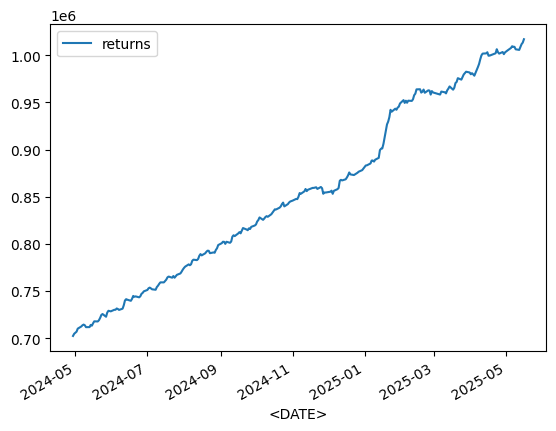

In [86]:
portfolio_ts.data.plot()

<Axes: xlabel='<DATE>'>

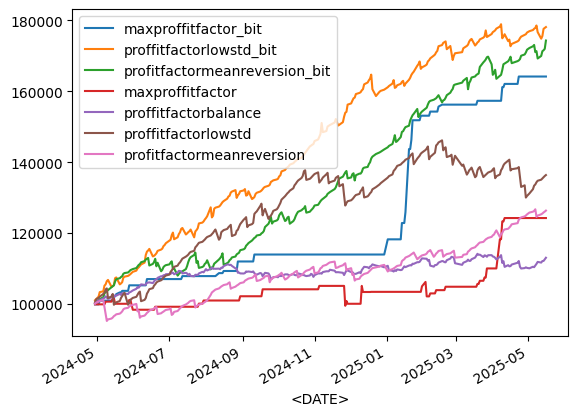

In [92]:
mts.data.plot()

In [93]:
mts.sharpe_ratio()

maxproffitfactor_bit             3.036522
proffitfactorlowstd_bit          5.205335
profitfactormeanreversion_bit    5.009680
maxproffitfactor                 1.658611
proffitfactorbalance             1.884174
proffitfactorlowstd              2.136045
profitfactormeanreversion        2.309283
dtype: float64

In [94]:
portfolio_ts.max_drawdown(percentage=True)

returns   -0.01028
dtype: float64

In [95]:
portfolio_ts.sharpe_ratio()

returns    8.154865
dtype: float64